In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc,accuracy_score

In [2]:
df=pd.read_csv('Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=df.drop('Loan_ID',axis=1)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Gender

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Gender']=df['Gender'].fillna('Male')

In [9]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

#### Married

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Married']=df['Married'].fillna('Yes')

In [13]:
import random

l=['Yes','No']
random.choice(l)

'Yes'

In [14]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [15]:
df['Married']=df['Married'].replace({'Yes':1,'No':0})

#### Dependents

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Dependents']=df['Dependents'].replace({'3+':3})

In [18]:
df['Dependents']=df['Dependents'].fillna('0')

In [19]:
df['Dependents'].isna().sum()

0

In [20]:
df['Dependents'].dtypes

dtype('O')

In [21]:
df['Dependents']=df['Dependents'].astype(int)

### Education

In [22]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [23]:
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})

In [24]:
df['Education']

0      1
1      1
2      1
3      0
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Education, Length: 614, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 55.3+ KB


### Self_Employed

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
 df['Self_Employed']= df['Self_Employed'].fillna('No')

In [28]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(5), object(2)
memory usage: 55.3+ KB


### LoanAmount

In [31]:
df['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [32]:
df['LoanAmount'].mean()

146.41216216216216

In [33]:
df['LoanAmount'].median()

128.0

<AxesSubplot: xlabel='LoanAmount', ylabel='Density'>

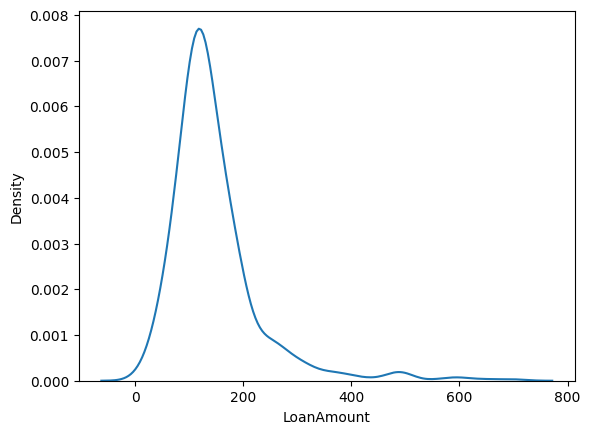

In [34]:
sns.kdeplot(df['LoanAmount'])

In [35]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [36]:
df['LoanAmount'].isna().sum()

0

In [65]:
df['Loan_Amount_Term'].isna().sum()

14

In [66]:
df['Loan_Amount_Term'].mean()

342.0

In [67]:
df['Loan_Amount_Term'].median()

360.0

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='Density'>

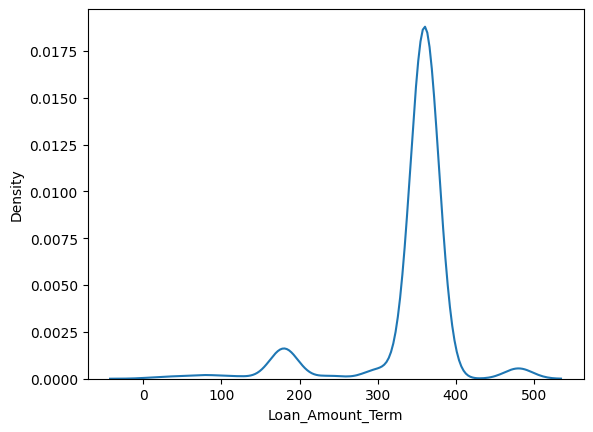

In [68]:
sns.kdeplot(df['Loan_Amount_Term'])

In [69]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


In [42]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [43]:
df['Credit_History']=df['Credit_History'].fillna(1)

In [44]:
df['Credit_History'].isna().sum()

0

In [47]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [48]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [49]:
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})

In [50]:
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


In [53]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [54]:

df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [55]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [73]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Model Train 

In [74]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [76]:
ab_model=AdaBoostClassifier()
ab_model.fit(x_train,y_train)

AdaBoostClassifier()

### Model Evaluation with test data

In [77]:
y_pred=ab_model.predict(x_test)

In [79]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

Confusion Matrix:
 [[29 28]
 [ 6 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.51      0.63        57
           1       0.76      0.94      0.84        97

    accuracy                           0.78       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.78      0.76       154



### Model Evaluation with train data

In [81]:
y_pred_train=ab_model.predict(x_train)

In [82]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[ 77  58]
 [  7 318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.70       135
           1       0.85      0.98      0.91       325

    accuracy                           0.86       460
   macro avg       0.88      0.77      0.81       460
weighted avg       0.87      0.86      0.85       460



In [83]:
y_prob=ab_model.predict_proba(x_test)

In [85]:
# y_prob

In [86]:
fpr,tpr,threshold=roc_curve(y_test,y_prob[:,1])

In [87]:
auc(fpr,tpr)

0.766503888587448

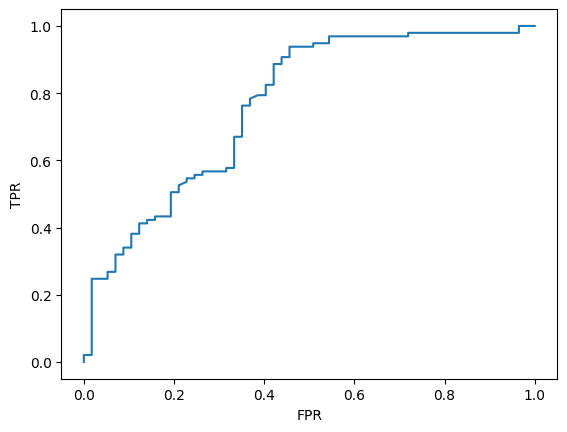

In [93]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<AxesSubplot: >

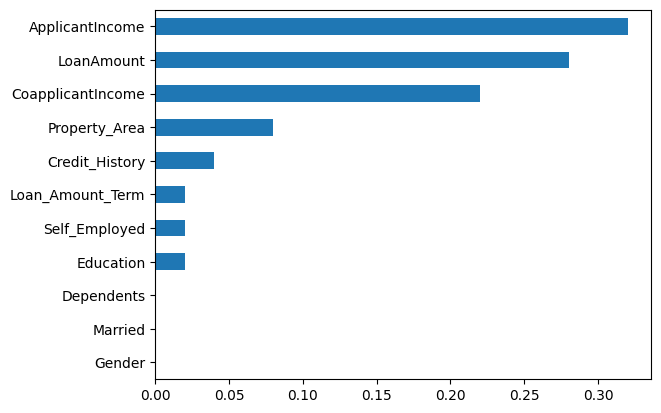

In [94]:
features_importance_series=pd.Series(ab_model.feature_importances_ , index=x.columns)
features_importance_series.sort_values().plot(kind='barh')

### Hyperparameter Tuning

In [99]:
import time

In [115]:
start_time=time.time()
ab_model=AdaBoostClassifier()
param_grid={'n_estimators':np.arange(10,100),
    'learning_rate':np.arange(0,2,0.001)}

rscv_ab_model=RandomizedSearchCV(ab_model,param_grid,cv=3)
rscv_ab_model.fit(x_train,y_train)
rscv_ab_model.best_estimator_

AdaBoostClassifier(learning_rate=0.248, n_estimators=61)

In [116]:
end_time=time.time()
total_time=end_time - start_time
print('Time taken to run the model:',total_time)

Time taken to run the model: 2.5939457416534424


In [117]:
new_ab_model=rscv_ab_model.best_estimator_

### Model evaluation with test data

In [118]:
y_pred=new_ab_model.predict(x_test)

In [119]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

Confusion Matrix:
 [[26 31]
 [ 4 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.46      0.60        57
           1       0.75      0.96      0.84        97

    accuracy                           0.77       154
   macro avg       0.81      0.71      0.72       154
weighted avg       0.79      0.77      0.75       154



### Model evaluation with train data

In [120]:
y_pred_train=new_ab_model.predict(x_train)

In [121]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[ 63  72]
 [  4 321]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.47      0.62       135
           1       0.82      0.99      0.89       325

    accuracy                           0.83       460
   macro avg       0.88      0.73      0.76       460
weighted avg       0.85      0.83      0.81       460



### ROC Curve

In [122]:
y_prob=new_ab_model.predict_proba(x_test)

In [123]:
fpr,tpr,threshold=roc_curve(y_test,y_prob[:,1])

In [124]:
auc(fpr,tpr)

0.7454331705552542

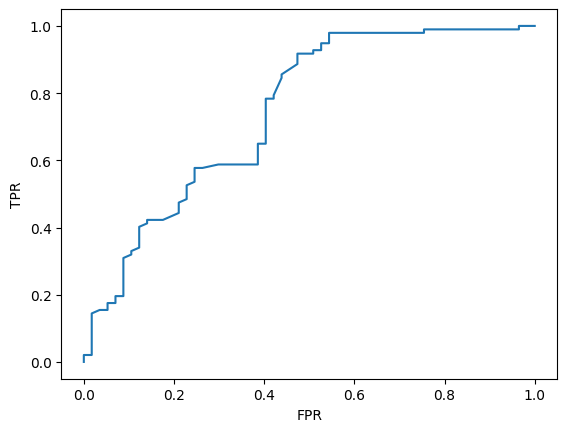

In [125]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### PR Curve

In [126]:
p,r,t=precision_recall_curve(y_test,y_prob[:,1])

In [127]:
auc(r,p)

0.7990754441389794

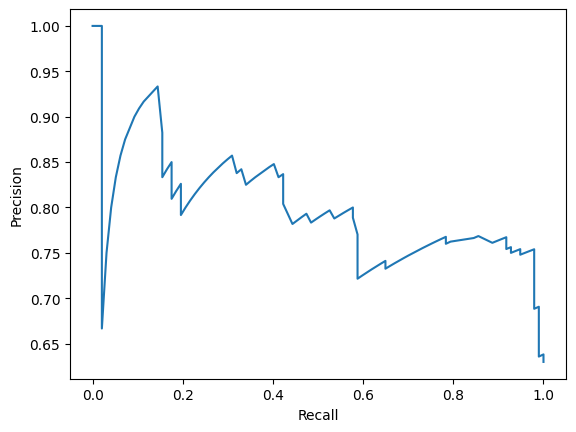

In [128]:
plt.plot(r,p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

<AxesSubplot: >

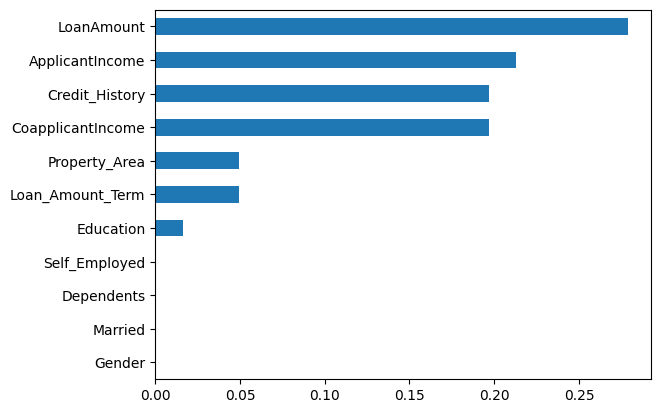

In [129]:
features_importance_series_1=pd.Series(new_ab_model.feature_importances_ , index=x.columns)
features_importance_series_1.sort_values().plot(kind='barh')

In [130]:
import json 
import pickle

In [131]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
Gender	Married	Dependents	Education	Self_Employed	ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Property_Area	Loan_Status
Male	No	    0	        Graduate	 No	            5849	        0.0	                NaN	        360.0	            1.0	            Urban	          Y
Male	Yes	1	Graduate	No	4583	1508.0	128.0	360.0	1.0	Rural	N

In [132]:
project_data={'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
              'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},
             'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
             'columns':list(x.columns)}

In [135]:
project_data['Gender']['Male']

1

In [136]:
project_data['columns']

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [137]:
with open('project_data.json','w') as f1:
    json.dump(project_data,f1)

In [138]:
with open('project_data.json','r') as f2:
    data=json.load(f2)

In [140]:
# data

In [141]:
with open('Adaboost_Loan_model.pickle','wb') as f3:
    pickle.dump(new_ab_model,f3)

### User Input

In [ ]:
Gender	Married	Dependents	Education	Self_Employed	ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Property_Area	Loan_Status
Male	No	    0	        Graduate	 No	            5849	        0.0	                NaN	        360.0	            1.0	            Urban	          Y
Male	Yes	1	            Graduate	No	            4583	        1508.0	            128.0	360.0	1.0	Rural	N

In [142]:
Gender='Male'
Married='Yes'
Dependents=1
Education='Graduate'
Self_Employed='No'
ApplicantIncome=4583
CoapplicantIncome=1508.0
LoanAmount=128
Loan_Amount_Term=360
Credit_History=1
Property_Area='Rural'

In [143]:
series=pd.Series(np.zeros(len(data['columns'])),index=x.columns)
series

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [154]:
series['Gender']=data['Gender'][Gender]
series['Married']=data['Married'][Married]
series['Dependents']=1
series['Education']=data['Education'][Education]
series['Self_Employed']=data['Self_Employed'][Self_Employed]
series['ApplicantIncome']=4583
series['CoapplicantIncome']=1508.0
series['LoanAmount']=128
series['Loan_Amount_Term']=360
series['Credit_History']=1
series['Property_Area']=data['Property_Area'][Property_Area]

pred_output=new_ab_model.predict([series])[0]
pred_output

C:\Users\SUNIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


1

In [155]:
if pred_output==1:
    print('Loan Approved')
elif pred_output==0:
    print('Loan Rejected')

Loan Approved


In [156]:
# series